### Batch Normalization

Normalize the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

1. where to use?
    - BN layer between linear transform and nonlinearity is the right place for the normalization.
2. why use it?
    - BN potentially helps in two ways: faster learning and higher overall accuracy.
    - The improved method also allows you to use a higher learning rate, potentially providing another boost in speed
3. why it works?
    - BN makes the data comparable across features. Basically, rather than just performing normalization once in the beginning, you're doing it all over place. 

reference

1. https://www.quora.com/Why-does-batch-normalization-help
2. http://kratzert.github.io/2016/02/12/understanding-the-gradient-flow-through-the-batch-normalization-layer.html
3. https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

comments:

no longer need BN https://arxiv.org/abs/1706.02515

In [1]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes=num_classes)

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu', input_shape = (32,32,3), kernel_initializer=))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=6, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

In [6]:
# optimizer
opt = optimizers.Adadelta(lr=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# train model
loss_hist = model.fit(x_train, y_train, epochs = 1000, batch_size=512)

Epoch 1/1000
50000/50000 [==============================] - 3s 59us/step - loss: 2.7068 - acc: 0.1461
Epoch 2/1000
50000/50000 [==============================] - 2s 40us/step - loss: 2.3998 - acc: 0.1963
Epoch 3/1000
50000/50000 [==============================] - 2s 39us/step - loss: 2.2421 - acc: 0.2312
Epoch 4/1000
50000/50000 [==============================] - 2s 40us/step - loss: 2.1411 - acc: 0.2529
Epoch 5/1000
50000/50000 [==============================] - 2s 43us/step - loss: 2.0664 - acc: 0.2768
Epoch 6/1000
50000/50000 [==============================] - 2s 40us/step - loss: 2.0142 - acc: 0.2877
Epoch 7/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.9645 - acc: 0.3048
Epoch 8/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.9407 - acc: 0.3159
Epoch 9/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.9084 - acc: 0.3238
Epoch 10/1000
50000/50000 [==============================] - 2s 40us/step - loss: 

50000/50000 [==============================] - 2s 41us/step - loss: 1.4307 - acc: 0.4836
Epoch 81/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4287 - acc: 0.4849
Epoch 82/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4301 - acc: 0.4834
Epoch 83/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4269 - acc: 0.4841
Epoch 84/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4241 - acc: 0.4845
Epoch 85/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4222 - acc: 0.4867
Epoch 86/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4215 - acc: 0.4873
Epoch 87/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.4176 - acc: 0.4903
Epoch 88/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.4176 - acc: 0.4890
Epoch 89/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.412

50000/50000 [==============================] - 2s 40us/step - loss: 1.3338 - acc: 0.5214
Epoch 160/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.3350 - acc: 0.5201
Epoch 161/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.3361 - acc: 0.5204
Epoch 162/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.3292 - acc: 0.5242
Epoch 163/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.3323 - acc: 0.5202
Epoch 164/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.3284 - acc: 0.5222
Epoch 165/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.3325 - acc: 0.5187
Epoch 166/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.3268 - acc: 0.5255
Epoch 167/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.3255 - acc: 0.5226
Epoch 168/1000
50000/50000 [==============================] - 2s 41us/step - lo

50000/50000 [==============================] - 2s 41us/step - loss: 1.2837 - acc: 0.5374
Epoch 238/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2835 - acc: 0.5405
Epoch 239/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2810 - acc: 0.5411
Epoch 240/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2854 - acc: 0.5409
Epoch 241/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2830 - acc: 0.5412
Epoch 242/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2778 - acc: 0.5424
Epoch 243/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2818 - acc: 0.5439
Epoch 244/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2750 - acc: 0.5453
Epoch 245/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2769 - acc: 0.5436
Epoch 246/1000
50000/50000 [==============================] - 2s 40us/step - lo

50000/50000 [==============================] - 2s 40us/step - loss: 1.2532 - acc: 0.5522
Epoch 316/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2504 - acc: 0.5536
Epoch 317/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2537 - acc: 0.5508
Epoch 318/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2492 - acc: 0.5546
Epoch 319/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2558 - acc: 0.5505
Epoch 320/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2448 - acc: 0.5540
Epoch 321/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2461 - acc: 0.5551
Epoch 322/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2499 - acc: 0.5546
Epoch 323/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2482 - acc: 0.5518
Epoch 324/1000
50000/50000 [==============================] - 2s 40us/step - lo

50000/50000 [==============================] - 2s 40us/step - loss: 1.2258 - acc: 0.5630
Epoch 394/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2260 - acc: 0.5630
Epoch 395/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2247 - acc: 0.5635
Epoch 396/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.2229 - acc: 0.5645
Epoch 397/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2225 - acc: 0.5641
Epoch 398/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.2225 - acc: 0.5652
Epoch 399/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.2180 - acc: 0.5660
Epoch 400/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.2187 - acc: 0.5680
Epoch 401/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.2248 - acc: 0.5615
Epoch 402/1000
50000/50000 [==============================] - 2s 41us/step - lo

50000/50000 [==============================] - 2s 41us/step - loss: 1.1980 - acc: 0.5722
Epoch 472/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1979 - acc: 0.5751
Epoch 473/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1963 - acc: 0.5737
Epoch 474/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1969 - acc: 0.5724
Epoch 475/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1941 - acc: 0.5775
Epoch 476/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1961 - acc: 0.5735
Epoch 477/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1959 - acc: 0.5747
Epoch 478/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1973 - acc: 0.5730
Epoch 479/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1969 - acc: 0.5736
Epoch 480/1000
50000/50000 [==============================] - 2s 41us/step - lo

50000/50000 [==============================] - 2s 41us/step - loss: 1.1712 - acc: 0.5834
Epoch 550/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1736 - acc: 0.5822
Epoch 551/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1732 - acc: 0.5848
Epoch 552/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1779 - acc: 0.5828
Epoch 553/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1741 - acc: 0.5831
Epoch 554/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1763 - acc: 0.5835
Epoch 555/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1697 - acc: 0.5877
Epoch 556/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1714 - acc: 0.5838
Epoch 557/1000
50000/50000 [==============================] - 2s 44us/step - loss: 1.1752 - acc: 0.5853
Epoch 558/1000
50000/50000 [==============================] - 2s 39us/step - lo

50000/50000 [==============================] - 2s 41us/step - loss: 1.1590 - acc: 0.5886
Epoch 628/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1615 - acc: 0.5861
Epoch 629/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1603 - acc: 0.5880
Epoch 630/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1546 - acc: 0.5893
Epoch 631/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1594 - acc: 0.5907
Epoch 632/1000
50000/50000 [==============================] - 2s 42us/step - loss: 1.1542 - acc: 0.5913
Epoch 633/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1565 - acc: 0.5900
Epoch 634/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1554 - acc: 0.5889
Epoch 635/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1586 - acc: 0.5887
Epoch 636/1000
50000/50000 [==============================] - 2s 40us/step - lo

50000/50000 [==============================] - 2s 39us/step - loss: 1.1468 - acc: 0.5935
Epoch 706/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1467 - acc: 0.5902
Epoch 707/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1442 - acc: 0.5940
Epoch 708/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1475 - acc: 0.5920
Epoch 709/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1488 - acc: 0.5909
Epoch 710/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1465 - acc: 0.5943
Epoch 711/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1459 - acc: 0.5946
Epoch 712/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1492 - acc: 0.5913
Epoch 713/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1448 - acc: 0.5923
Epoch 714/1000
50000/50000 [==============================] - 2s 40us/step - lo

50000/50000 [==============================] - 2s 40us/step - loss: 1.1371 - acc: 0.5961
Epoch 784/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1322 - acc: 0.5998
Epoch 785/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1335 - acc: 0.5991
Epoch 786/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1341 - acc: 0.5959
Epoch 787/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1318 - acc: 0.5995
Epoch 788/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1397 - acc: 0.5962
Epoch 789/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1359 - acc: 0.5967
Epoch 790/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1413 - acc: 0.5957
Epoch 791/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1408 - acc: 0.5973
Epoch 792/1000
50000/50000 [==============================] - 2s 40us/step - lo

50000/50000 [==============================] - 2s 38us/step - loss: 1.1292 - acc: 0.6005
Epoch 862/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1234 - acc: 0.6037
Epoch 863/1000
50000/50000 [==============================] - 2s 41us/step - loss: 1.1335 - acc: 0.5975
Epoch 864/1000
50000/50000 [==============================] - 2s 40us/step - loss: 1.1293 - acc: 0.6013
Epoch 865/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1296 - acc: 0.5990
Epoch 866/1000
50000/50000 [==============================] - 2s 39us/step - loss: 1.1299 - acc: 0.5983
Epoch 867/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1310 - acc: 0.5998
Epoch 868/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1273 - acc: 0.6007
Epoch 869/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1291 - acc: 0.5995
Epoch 870/1000
50000/50000 [==============================] - 2s 38us/step - lo

50000/50000 [==============================] - 2s 38us/step - loss: 1.1242 - acc: 0.6036
Epoch 940/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1214 - acc: 0.6026
Epoch 941/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1213 - acc: 0.6052
Epoch 942/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1248 - acc: 0.6017
Epoch 943/1000
50000/50000 [==============================] - 2s 37us/step - loss: 1.1218 - acc: 0.6031
Epoch 944/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1234 - acc: 0.6020
Epoch 945/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1289 - acc: 0.5970
Epoch 946/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1229 - acc: 0.6024
Epoch 947/1000
50000/50000 [==============================] - 2s 38us/step - loss: 1.1239 - acc: 0.6013
Epoch 948/1000
50000/50000 [==============================] - 2s 38us/step - lo

In [8]:
# evaluate model
test_eval = model.evaluate(x_test, y_test)
print("test loss : ", test_eval[0])
print("test acc : ", test_eval[1])

10000/10000 [==============================] - 0s 46us/step
test loss :  1.06217864952
test acc :  0.6234


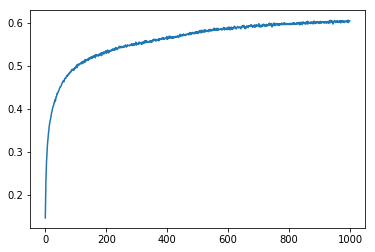

In [10]:
# display sample image
import matplotlib.pyplot as plt
# display acc history
plt.plot(loss_hist.history['acc'])
plt.show()